<a href="https://colab.research.google.com/github/killian31/mva_dlts_24_denoising/blob/test_branch_name/Notebook%20-%20KS%20FS%20-%20Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Signal Processing and Deep Learning Final Project : Denoising

Authors : Killian Steunou, François Saulnier

## Revue de litérature
Cette section présente une rapide revue des méthodes proposées pour traiter ce problème, divisée en deux partie : 
- Les méthodes agissant sur le spectrogramme : A. Jansson et Al., SINGING VOICE SEPARATION WITH DEEP U-NET CONVOLUTIONAL NETWORK, ISMIR 2017
- Les méthodes agissant sur la forme d'onde  :
    - D. Stoller  et Al., WAVE-U-NET: A MULTI-SCALE NEURAL NETWORK FOR END-TO-END AUDIO SOURCE SEPARATION, ISMIR 2018
    - TAS NEt :
        - Y. Luo et Al., TaSNet: Time-Domain Audio Separation Network for Real-Time, Single-Channel
    Speech Separation, ICASSP 2018 
        - Y. Luo et Al.,  Conv-tasnet: surpassing ideal time–frequency magnitude masking
    for speech separation. IEEE/ACM Transactions on Audio, Speech, and Language Processing, 2019.

### Méthodes Spectrogramme
#### *A. Jansson et Al., Singing Voice Separation with Deep U-Net Convolutional Network, ISMIR 2017*

##### Idée générale

- Le but est d'isoler la mélodie chantée de l'accompagnement instrumental.
- Deux U-Net : 
    - un pour apprendre à masquer l'accompagnement par le masque $f(X, \Theta_v)$, qui appliqué au spectrogramme $X$ donné au modèle, donne une prédiction de la voix. La loss est $|| f(X, \Theta_v) \odot X - Y_v ||_{1, 1}$
    - un pour apprendre à masquer la voix par le masque $f(X, \Theta_i)$, qui appliqué au spectrogramme $X$ donné au modèle, donne une prédiction des instruments. La loss est $|| f(X, \Theta_i) \odot X - Y_i ||_{1, 1}$

##### Architecture

![Deep U-Net audio source separation architecture](https://camo.githubusercontent.com/ee525acc2add2198749036bf76ea627b9972f881ee844099cb301f9745b843ba/68747470733a2f2f706963342e7a68696d672e636f6d2f76322d38646638636164316466343765346134626537363533373831353636333335325f31323030783530302e6a7067)

##### Évaluation
Pour mesurer la performance, ils utilisent les fonctions suivantes: 
- Normalized Signal-To-Distortion Ratio (NSDR) : $\text{NSDR}(S_e, S_r , S_m) = \text{SDR}(S_e, S_r )−\text{SDR}(S_m, S_r )$ où $S_e$ est le signal isolé estimé, $S_r$ est le signal isolé de référence, et $S_m$ est le signal mix (original non séparé).
- Signal-to-Interference Ratio (SIR), 
- Signal-to-Artifact Ratio (SAR)

et une évaluation subjective menée par des humains.

##### Résultats

Sur la dataset iKala, moyennes :

| | U-Net | Baseline (U-Net sans skip-con.) | Chimera (ex-SOTA) |
| --- | --- | --- | --- |
| NSDR Vocal | **11.094** | 8.549 | 8.749 |
| NSDR Instrumental | **14.435** | 10.906 | 11.626 |
| SIR Vocal | **23.960** | 20.402 | 21.301 |
| SIR Instrumental | **21.832** | 14.304 | 20.481 |
| SAR Vocal | **17.715** | 15.481 | 15.642 |
| SAR Instrumental | **14.120** | 12.002 | 11.539 |

### Méthodes Forme d'onde
#### *D. Stoller  et Al., Wave-U-Net: A Multi-Scale Neural Network for End-to-end Audio Source Separation, ISMIR 2018*

##### Idée Generale
Adaptation du U-Net dans le domaine temporel. Leur modèle apprend directement à prédire les $K$ signaux sources qui font partie du signal mixé donné en entrée.

##### Architecture
![Wave-U-Net architecture](https://raw.githubusercontent.com/f90/Wave-U-Net/master/waveunet.png)

##### Évaluation
Ils utilisent seulement le SDR, et comparent avec le U-Net du domaine spectral, et une variante entraîné avec une loss L1 sur les magnitudes spectrales.

##### Résultats

| | M1 | M2 | M3 | M4 | M5 | M7 | U-Net | U-Net(a) |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| SDR Vocal | -0.12 | 0.05 | 0.31 | **0.65**| 0.55 | -0.23 | -0.66 | 0.51 |
| SDR Instrumental | 7.62 | 7.68 | 7.66 | **11.85** | 11.74 | 7.15 | 6.90 | 6.85 |

#### *Y. Luo et Al., TasNet: time-domain audio separation network for real-time, single-channel speech separation, ICASSP 2018* et *Y. Luo et Al.,  Conv-tasnet: surpassing ideal time–frequency magnitude masking for speech separation. IEEE/ACM Transactions on Audio, Speech, and Language Processing, 2019.*

##### Idée Générale
TasNet opère directement dans le domaine temporel à l'aide d'un modèle encodeur-décodeur.

- Encodeur : Le signal audio d'entrée est segmenté en courts morceaux (~5 ms) et transformé en une représentation non négative à l'aide d'une couche de convolution 1D.
- Module de séparation : Un réseau, basé sur des LSTM, génère des masques pour séparer les sources en estimant leur contribution respective dans la représentation encodée.
- Décodeur : Les masques sont appliqués aux représentations encodées pour reconstruire les signaux des différentes sources, directement dans le domaine temporel.

Conv-TasNet est une extension de TasNet. Il remplace les modules LSTM de TasNet par un réseau convolutif temporel, et est donc beaucoup plus rapide.

##### Architecture
**TasNet** :
![TasNet model architecture](https://ar5iv.labs.arxiv.org/html/1711.00541/assets/figures/flowchart_v2.png)
**Conv-TasNet** :
![Conv-TasNet model architecture](https://production-media.paperswithcode.com/methods/tasnet_4isUkmw.png)

##### Évaluation
Ils utilisent les métriques SI-SNR improvement (SI-SNRi : mesure la qualité de la séparation en comparant le rapport signal-bruit avant et après séparation, en prenant en compte l'invariance à l'échelle) and SDR improvement (SDRi : évalue la qualité de reconstruction en quantifiant la distorsion introduite dans les signaux séparés par rapport aux signaux de référence)

##### Résultats
| Méthode                 | SI-SNRi (dB)      | SDRi (dB)       |
|-------------------------|-------------------|-----------------|
| uPIT-LSTM               | -                 | 7.0             |
| TasNet-LSTM             | 7.7               | 8.0             |
| DPCL++                  | 10.8              | -               |
| DANet                   | 10.5              | -               |
| uPIT-BLSTM-ST           | -                 | 10.0            |
| TasNet-BLSTM            | 10.8              | 11.1            |
| Conv-TasNet             | **15.3**          | **15.6**        |



## Librairies utilisées

In [3]:
!pip install pystoi batch-pystoi pesq tqdm torchinfo librosa
#!git clone https://github.com/killian31/mva_dlts_24_denoising.git
#!mv mva_dlts_24_denoising/* .
#!rm -r mva_dlts_24_denoising


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [142]:
import numpy as np
import matplotlib.pylab as plt
import scipy
import IPython.display as ipd
from scipy.signal import resample
import os
from torch.utils.data import Dataset
import torchaudio
import torchaudio.transforms as T
import torch
from Conv_TasNet_Pytorch.Conv_TasNet import ConvTasNet
from Conv_TasNet_Pytorch.SI_SNR import SI_SNR
from pesq import pesq_batch
from itertools import permutations
from pesq import pesq
from pystoi import stoi
from tqdm import tqdm
from batch_pystoi import stoi as stoi_batch
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.optim import Adam
import matplotlib.pyplot as plt
from  torchinfo import summary
import librosa
from svs_unet import UNet

## Chargement des données

### Télécharger les données

In [5]:
!mkdir data
# download denoising data
!wget -O data/denoising.zip https://cloud.leviia.com/s/ZnIy.3xerJBY8PDKNrBL/download?path=%2FProjets%2FAudio%2Fdenoising
# download voice_origin data
!wget -O data/voice_origin.zip https://cloud.leviia.com/s/ZnIy.3xerJBY8PDKNrBL/download?path=%2FProjets%2FAudio%2Fvoice_origin
# unzip all files
!unzip -qq -o data/denoising.zip -d data/
!unzip -qq -o data/voice_origin.zip -d data/
# unzip denoising folders
!unzip -qq data/denoising/test.zip -d data/denoising/
!echo "Unzipped denoising/test.zip"
!unzip -qq data/denoising/train.zip -d data/denoising/
!echo "Unzipped denoising/train.zip"
!unzip -qq data/denoising/train_small.zip -d data/denoising/
!echo "Unzipped denoising/train_small.zip"
# unzip voice_origin folders
!unzip -qq data/voice_origin/test.zip -d data/voice_origin/
!echo "Unzipped voice_origin/test.zip"
!unzip -qq data/voice_origin/train.zip -d data/voice_origin/
!echo "Unzipped voice_origin/train.zip"
!unzip -qq data/voice_origin/train_small.zip -d data/voice_origin/
!echo "Unzipped voice_origin/train_small.zip"
# remove all zip files
!rm data/denoising.zip
!rm data/voice_origin.zip
!rm data/denoising/test.zip
!rm data/denoising/train.zip
!rm data/denoising/train_small.zip
!rm data/voice_origin/test.zip
!rm data/voice_origin/train.zip
!rm data/voice_origin/train_small.zip
# done
!echo "Successfully downloaded and unzipped data."

--2024-12-24 12:46:55--  https://cloud.leviia.com/s/ZnIy.3xerJBY8PDKNrBL/download?path=%2FProjets%2FAudio%2Fdenoising
Résolution de cloud.leviia.com (cloud.leviia.com)… 51.83.19.200, 46.105.50.201, 213.251.181.36
Connexion à cloud.leviia.com (cloud.leviia.com)|51.83.19.200|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : non indiqué [application/zip]
Sauvegarde en : « data/denoising.zip »

data/denoising.zip      [     <=>            ] 818,09M  23,6MB/s    ds 33s     

2024-12-24 12:47:28 (24,6 MB/s) - « data/denoising.zip » sauvegardé [857833302]

--2024-12-24 12:47:29--  https://cloud.leviia.com/s/ZnIy.3xerJBY8PDKNrBL/download?path=%2FProjets%2FAudio%2Fvoice_origin
Résolution de cloud.leviia.com (cloud.leviia.com)… 46.105.50.201, 213.251.181.36, 51.83.19.200
Connexion à cloud.leviia.com (cloud.leviia.com)|46.105.50.201|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : non indiqué [application/zip]
Sauvegarde en : « data

In [164]:
class AudioDataset(Dataset):
    def __init__(self, data_path, train=True, transform=None):
        self.data_path = data_path
        self.train = train
        self.transform = transform

        subset = 'train' if train else 'test'

        self.denoising_path = os.path.join(data_path, 'denoising', subset)
        self.voice_origin_path = os.path.join(data_path, 'voice_origin', subset)

        self.denoising_files = [os.path.join(self.denoising_path, f) for f in os.listdir(self.denoising_path) if f.endswith('.wav')]
        self.voice_origin_files = [os.path.join(self.voice_origin_path, f) for f in os.listdir(self.voice_origin_path) if f.endswith('.wav')]

        assert len(self.denoising_files) == len(self.voice_origin_files), "Mismatch between denoising and voice_origin files"

        self.file_pairs = list(zip(self.denoising_files, self.voice_origin_files))

    def __len__(self):
        return len(self.file_pairs)

    def __getitem__(self, idx):
        if isinstance(idx, slice):
            raise NotImplementedError("Slicing is not supported")

        denoising_file, voice_origin_file = self.file_pairs[idx]

        denoising_waveform, denoising_sample_rate = torchaudio.load(denoising_file)
        voice_origin_waveform, voice_origin_sample_rate = torchaudio.load(voice_origin_file)

        assert denoising_sample_rate == voice_origin_sample_rate, "Sample rates do not match"

        sample = {
            'denoising': denoising_waveform.squeeze(),
            'voice_origin': voice_origin_waveform.squeeze(),
            'sample_rate': denoising_sample_rate
        }

        if self.transform:
            sample = self.transform(sample)

        return sample


class AudioSpectrogramDataset(Dataset):
    def __init__(self, data_path, train=True, win_size=1024, hop_size=768, sr=8000, target_length=128):
        self.data_path = data_path
        self.train = train
        self.win_size = win_size
        self.hop_size = hop_size
        self.sr = sr
        self.target_length = target_length

        subset = 'train' if train else 'test'
        self.denoising_path = os.path.join(data_path, 'denoising', subset)
        self.voice_origin_path = os.path.join(data_path, 'voice_origin', subset)

        self.denoising_files = [os.path.join(self.denoising_path, f) for f in os.listdir(self.denoising_path) if f.endswith('.wav')]
        self.voice_origin_files = [os.path.join(self.voice_origin_path, f) for f in os.listdir(self.voice_origin_path) if f.endswith('.wav')]

        assert len(self.denoising_files) == len(self.voice_origin_files), "Mismatch between denoising and voice_origin files"
        self.file_pairs = list(zip(self.denoising_files, self.voice_origin_files))

    def __len__(self):
        return len(self.file_pairs)

    def __getitem__(self, idx):
        denoising_file, voice_origin_file = self.file_pairs[idx]

        # Load audio
        denoising_waveform, _ = librosa.load(denoising_file, sr=self.sr, mono=True)
        voice_origin_waveform, _ = librosa.load(voice_origin_file, sr=self.sr, mono=True)

        # Convert to spectrogram
        denoising_spec, denoising_phase = self._wave_to_spec(denoising_waveform)
        voice_origin_spec, voice_origin_phase = self._wave_to_spec(voice_origin_waveform)

        # Pad or truncate spectrogram to target length
        denoising_spec = self._resize_spectrogram(denoising_spec, self.target_length)
        voice_origin_spec = self._resize_spectrogram(voice_origin_spec, self.target_length)

        sample = {
            'denoising': denoising_spec,
            'voice_origin': voice_origin_spec,
            'denoising_phase': denoising_phase,
            'voice_origin_phase': voice_origin_phase,
            'sample_rate': self.sr
        }

        return sample

    def _wave_to_spec(self, waveform):
        stft = librosa.stft(waveform, n_fft=self.win_size, hop_length=self.hop_size)
        magnitude, phase = librosa.magphase(stft)
        magnitude = self._resize_spectrogram(magnitude, self.target_length)
        phase = self._resize_spectrogram(phase, self.target_length)
        return magnitude.astype(np.float32), phase.astype(np.complex64)

    def _resize_spectrogram(self, spectrogram, target_length):
        time_dim = spectrogram.shape[1]
        if time_dim < target_length:
            padding = target_length - time_dim
            spectrogram = np.pad(spectrogram, ((0, 0), (0, padding)), mode='constant')
        else:
            spectrogram = spectrogram[:, :target_length]
        return spectrogram


def spectrogram_to_waveform(magnitude, phase, win_size=1024, hop_size=768, sr=8000, original_length=None):
    if isinstance(magnitude, torch.Tensor):
        magnitude = magnitude.detach().cpu().numpy()
    if isinstance(phase, torch.Tensor):
        phase = phase.detach().cpu().numpy()

    if magnitude.shape != phase.shape:
        min_time_dim = min(magnitude.shape[1], phase.shape[1])
        magnitude = magnitude[:, :min_time_dim]
        phase = phase[:, :min_time_dim]

    spectrogram = magnitude * phase
    spectrogram = spectrogram.astype(np.complex64, copy=False)

    waveform = librosa.istft(
        spectrogram,
        win_length=win_size,
        hop_length=hop_size,
        length=original_length
    )
    return waveform

In [165]:
data_path = './data'
train_waveform_dataset = AudioDataset(data_path, train=True)
test_waveform_dataset = AudioDataset(data_path, train=False)

train_loader_waveform = torch.utils.data.DataLoader(train_waveform_dataset, batch_size=1, shuffle=True)
test_loader_waveform = torch.utils.data.DataLoader(test_waveform_dataset, batch_size=1, shuffle=False)

train_spectrogram_dataset = AudioSpectrogramDataset(data_path, train=True)
test_spectrogram_dataset = AudioSpectrogramDataset(data_path, train=False)

train_loader_spectrogram = torch.utils.data.DataLoader(train_spectrogram_dataset, batch_size=1, shuffle=True)
test_loader_spectrogram = torch.utils.data.DataLoader(test_spectrogram_dataset, batch_size=1, shuffle=False)

In [166]:
audio_sample = next(iter(test_loader_waveform))
denoising_waveform = audio_sample['denoising']
voice_origin_waveform = audio_sample['voice_origin']
sample_rate = audio_sample['sample_rate']
print(f"Denoising waveform shape: {denoising_waveform.shape}")
print(f"Voice origin waveform shape: {voice_origin_waveform.shape}")
print(f"Sample rate: {sample_rate}")
spectro_sample = next(iter(test_loader_spectrogram))
denoising_spectrogram = spectro_sample['denoising']
voice_origin_spectrogram = spectro_sample['voice_origin']
sample_rate = spectro_sample['sample_rate']
print(f"Denoising spectrogram shape: {denoising_spectrogram.shape}")
print(f"Voice origin spectrogram shape: {voice_origin_spectrogram.shape}")
print(f"Sample rate: {sample_rate}")

Denoising waveform shape: torch.Size([1, 80000])
Voice origin waveform shape: torch.Size([1, 80000])
Sample rate: tensor([8000])
Denoising spectrogram shape: torch.Size([1, 513, 128])
Voice origin spectrogram shape: torch.Size([1, 513, 128])
Sample rate: tensor([8000])


In [167]:
ipd.Audio(spectrogram_to_waveform(voice_origin_spectrogram.squeeze(), spectro_sample['voice_origin_phase'].squeeze(), original_length=voice_origin_waveform.shape[1]), rate=int(sample_rate))

In [168]:
ipd.Audio(voice_origin_waveform.squeeze(), rate=int(sample_rate))

## Implémentation des différents modèles

### Implémentation d'une baseline : Réseau Convolutif

In [169]:
class BaselineModel():
    def __init__(self, num_spks=1):
        self.num_spks = num_spks
        pass

    def forward(self, x):
        return x

### Conv-TasNet

In [170]:
# Load convTasNet with the official pytorch implementation from 
# https://github.com/JusperLee/Conv-TasNet/
conv_tasnet = ConvTasNet(
    N=512, # Number of ﬁlters in autoencoder
    L=16, # Length of the ﬁlters (in samples)
    B=128, # Number of channels in bottleneck and the residual paths’ 1 × 1-conv blocks
    H=512, # Number of channels in convolutional blocks
    P=3, # Kernel size in convolutional blocks
    X=8, # Number of convolutional blocks in each repeat
    R=3, # Number of repeats
    norm="gln",
    num_spks=1,
    activate="relu",
    causal=False
)

In [191]:
summary(conv_tasnet, input_size=(1, 80000), verbose=0, device='cpu')

Layer (type:depth-idx)                        Output Shape              Param #
ConvTasNet                                    [80000]                   --
├─Conv1D: 1-1                                 [1, 512, 9999]            8,704
├─CumulativeLayerNorm: 1-2                    [1, 512, 9999]            1,024
├─Conv1D: 1-3                                 [1, 128, 9999]            65,664
├─Sequential: 1-4                             [1, 128, 9999]            --
│    └─Sequential: 2-1                        [1, 128, 9999]            --
│    │    └─Conv1D_Block: 3-1                 [1, 128, 9999]            135,810
│    │    └─Conv1D_Block: 3-2                 [1, 128, 9999]            135,810
│    │    └─Conv1D_Block: 3-3                 [1, 128, 9999]            135,810
│    │    └─Conv1D_Block: 3-4                 [1, 128, 9999]            135,810
│    │    └─Conv1D_Block: 3-5                 [1, 128, 9999]            135,810
│    │    └─Conv1D_Block: 3-6                 [1, 128, 9999]

#### Exemple

In [172]:
input_sample = next(iter(train_loader_waveform))
denoising_sample = input_sample['denoising'] # [1, 80000]
voice_origin_sample = input_sample['voice_origin'] # [1, 80000]
sample_rate = input_sample['sample_rate'] # 8000
output_sample = conv_tasnet(denoising_sample) # list[1 element] of [1, 80000]
print(f"The output is a list of {len(output_sample)} sources, as specified with num_spk={len(output_sample)} in the ConvTasNet model.")
source_1 = output_sample[0] # [, 80000] -> [1, 80000]
ipd.Audio(source_1.detach().numpy(), rate=int(sample_rate))

The output is a list of 1 sources, as specified with num_spk=1 in the ConvTasNet model.


### U-Net Spectral (SVS-UNet)

In [190]:
from svs_unet import UNet
svs_model = UNet()
summary(svs_model, input_size=(1,1, 513, 128), verbose=0, device='cpu')

Layer (type:depth-idx)                   Output Shape              Param #
UNet                                     [1, 1, 513, 128]          --
├─Sequential: 1-1                        [1, 16, 257, 64]          --
│    └─Conv2d: 2-1                       [1, 16, 257, 64]          416
│    └─BatchNorm2d: 2-2                  [1, 16, 257, 64]          32
│    └─LeakyReLU: 2-3                    [1, 16, 257, 64]          --
├─Sequential: 1-2                        [1, 32, 129, 32]          --
│    └─Conv2d: 2-4                       [1, 32, 129, 32]          12,832
│    └─BatchNorm2d: 2-5                  [1, 32, 129, 32]          64
│    └─LeakyReLU: 2-6                    [1, 32, 129, 32]          --
├─Sequential: 1-3                        [1, 64, 65, 16]           --
│    └─Conv2d: 2-7                       [1, 64, 65, 16]           51,264
│    └─BatchNorm2d: 2-8                  [1, 64, 65, 16]           128
│    └─LeakyReLU: 2-9                    [1, 64, 65, 16]           --
├─Seq

#### Exemple

In [174]:
input_sample = next(iter(train_loader_spectrogram))
denoising_sample = input_sample['denoising'] # [1, 513, 128]
voice_origin_sample = input_sample['voice_origin'] # [1, 513, 128]
sample_rate = input_sample['sample_rate'] # 8000
output_sample = svs_model(denoising_sample.unsqueeze(0)) # [1, 513, 128]
source = output_sample # [1, 513, 128]
ipd.Audio(spectrogram_to_waveform(source.squeeze(), input_sample['voice_origin_phase'].squeeze(), original_length=80000), rate=int(sample_rate))


## Métriques

In [175]:
def sisnr(x, s, eps=1e-8):
    """
    calculate training loss
    input:
          x: separated signal, N x S tensor
          s: reference signal, N x S tensor
    Return:
          sisnr: N tensor
    """

    def l2norm(mat, keepdim=False):
        return torch.norm(mat, dim=-1, keepdim=keepdim)

    if x.shape != s.shape:
        raise RuntimeError(
            "Dimention mismatch when calculate si-snr, {} vs {}".format(
                x.shape, s.shape))
    x_zm = x - torch.mean(x, dim=-1, keepdim=True)
    s_zm = s - torch.mean(s, dim=-1, keepdim=True)
    t = torch.sum(
        x_zm * s_zm, dim=-1,
        keepdim=True) * s_zm / (l2norm(s_zm, keepdim=True)**2 + eps)
    return 20 * torch.log10(eps + l2norm(t) / (l2norm(x_zm - t) + eps))

def si_snr_loss(ests, egs):
    # spks x n x S
    refs = egs["voice_origin"]
    num_spks = len(refs)

    def sisnr_loss(permute):
        # for one permute
        return sum(
            [sisnr(ests[s], refs[t])
             for s, t in enumerate(permute)]) / len(permute)
        # average the value

    # P x N
    N = egs["denoising"].size(0)
    sisnr_mat = torch.stack(
        [sisnr_loss(p) for p in permutations(range(num_spks))])
    max_perutt, _ = torch.max(sisnr_mat, dim=0)
    # si-snr
    return -torch.sum(max_perutt) / N

In [177]:
input_sample = next(iter(train_loader_waveform))
denoising_sample = input_sample['denoising'] # [1, 80000]
voice_origin_sample = input_sample['voice_origin'] # [1, 80000]
sample_rate = input_sample['sample_rate'] # 8000
output_sample = conv_tasnet(denoising_sample) # list[1 element] of [1, 80000]
source_1 = output_sample[0] # [, 80000] -> [1, 80000]
pesq_score = pesq_batch(sample_rate, voice_origin_sample.detach().numpy(), source_1.unsqueeze(0).detach().numpy(), mode='nb')
pesq_perfect = pesq_batch(sample_rate, voice_origin_sample.detach().numpy(), voice_origin_sample.detach().numpy(), mode='nb')
stoi_score = stoi_batch(source_1.unsqueeze(0).detach().numpy(), voice_origin_sample.detach().numpy(), int(sample_rate))
stoi_perfect = stoi_batch(voice_origin_sample.detach().numpy(), voice_origin_sample.detach().numpy(), int(sample_rate))
loss = si_snr_loss(output_sample, input_sample)
loss_perfect = si_snr_loss(voice_origin_sample, input_sample)
print(f"SI-SNR loss: {loss}")
print(f"SI-SNR loss for perfect reconstruction: {loss_perfect}")
print(f"PESQ score: {pesq_score}")
print(f"PESQ score for perfect reconstruction: {pesq_perfect}")
print(f"STOI score: {stoi_score}")
print(f"STOI score for perfect reconstruction: {stoi_perfect}")

SI-SNR loss: 37.59663772583008
SI-SNR loss for perfect reconstruction: -95.3477783203125
PESQ score: [1.3282123804092407]
PESQ score for perfect reconstruction: [4.548638343811035]
STOI score: [0.35144339]
STOI score for perfect reconstruction: [1.]


In [178]:
spectro_criterion = torch.nn.L1Loss()
input_sample = next(iter(train_loader_spectrogram))
denoising_spectrogram = input_sample['denoising'] # [1, 513, 128]
voice_origin_spectrogram = input_sample['voice_origin'] # [1, 513, 128]
sample_rate = input_sample['sample_rate'] # 8000
output_spectrogram = svs_model(denoising_spectrogram.unsqueeze(0)) # [1, 1, 513, 128]
print(f"The output is a spectrogram of shape {output_spectrogram.shape}.")
prediction = denoising_spectrogram * output_spectrogram.squeeze()
loss = spectro_criterion(prediction, voice_origin_spectrogram)
perfect_loss = spectro_criterion(voice_origin_spectrogram, voice_origin_spectrogram)
print(f"The loss is {loss.item()}")
print(f"The perfect loss is {perfect_loss.item()}")
temporal_prediction = spectrogram_to_waveform(prediction.squeeze(), input_sample['denoising_phase'].squeeze(), original_length=80000)
temporal_voice_origin = spectrogram_to_waveform(voice_origin_spectrogram.squeeze(), input_sample['voice_origin_phase'].squeeze(), original_length=80000)
output_stoi = stoi_batch(temporal_prediction, temporal_voice_origin, int(sample_rate))
perfect_stoi = stoi_batch(temporal_voice_origin, temporal_voice_origin, int(sample_rate))
output_pesq = pesq_batch(int(sample_rate), temporal_prediction, temporal_voice_origin, mode='nb')
perfect_pesq = pesq_batch(int(sample_rate), temporal_voice_origin, temporal_voice_origin, mode='nb')
print(f"The STOI is {output_stoi}")
print(f"The perfect STOI is {perfect_stoi}")
print(f"The PESQ is {output_pesq}")
print(f"The perfect PESQ is {perfect_pesq}")

The output is a spectrogram of shape torch.Size([1, 1, 513, 128]).
The loss is 0.17125602066516876
The perfect loss is 0.0
The STOI is 0.5456725546943237
The perfect STOI is 1.0
The PESQ is [1.3876302242279053]
The perfect PESQ is [4.548638343811035]


## Entraînement

In [179]:
class WarmupScheduler:
    def __init__(self, optimizer, warmup_iters, target_lr):
        self.optimizer = optimizer
        self.warmup_iters = warmup_iters
        self.target_lr = target_lr
        self.current_iter = 0

    def step(self):
        self.current_iter += 1
        if self.current_iter <= self.warmup_iters:
            # exponentially increase the learning rate
            warmup_lr = self.target_lr * (self.current_iter / self.warmup_iters) ** 2
            for param_group in self.optimizer.param_groups:
                param_group['lr'] = warmup_lr

    def is_warmup_done(self):
        return self.current_iter >= self.warmup_iters

def train(
    model,
    train_dataloader,
    val_dataloader,
    device,
    optimizer,
    criterion,
    save_to,
    num_epochs=10,
    base_lr=0.01,
    warmup=True,
    warmup_iters=50,
    plateau=True,
    lr_patience=5,
    lr_factor=0.5,
    model_type='ConvTasNet',
):
    train_losses = []
    val_losses = []
    train_pesqs = []
    val_pesqs = []
    train_stois = []
    val_stois = []
    learning_rates = []
    warmup_scheduler = WarmupScheduler(optimizer, warmup_iters, base_lr)
    plateau_scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=lr_patience, factor=lr_factor, verbose=True)

    model.to(device)

    try:
        for i in range(num_epochs):
            model.train()
            train_loss = 0.0
            train_pesq = 0.0
            train_stoi = 0.0
            val_loss = 0.0
            val_pesq = 0.0
            val_stoi = 0.0

            print(f"Epoch {i+1}/{num_epochs}")
            for batch in tqdm(train_dataloader):
                batch['denoising'] = batch['denoising'].to(device)
                batch['voice_origin'] = batch['voice_origin'].to(device)
                batch['sample_rate'] = batch['sample_rate'].to(device)
                optimizer.zero_grad()
                
                if model_type == 'ConvTasNet':
                    output = model(batch['denoising'])
                    prediction = output[0].unsqueeze(0).cpu().detach().numpy()
                    sample_rate = int(batch['sample_rate'].cpu().item())
                    voice_origin = batch['voice_origin'].cpu().detach().numpy()
                    loss = criterion(output, batch)
                elif model_type == 'BaselineModelWaveform':
                    pass
                elif model_type == 'BaseLineModelSpectrogram':
                    pass
                elif model_type == 'SpectrogramModel':
                    mask_pred = model(batch['denoising'].unsqueeze(0))
                    sample_rate = int(batch['sample_rate'].cpu().item())
                    prediction = batch['denoising'] * mask_pred.squeeze()
                    loss = criterion(prediction, batch['voice_origin'])
                    voice_origin = spectrogram_to_waveform(
                        batch['voice_origin'].squeeze(), 
                        batch['voice_origin_phase'].squeeze(), 
                        original_length=80000
                    ).reshape(1, -1)
                    prediction = spectrogram_to_waveform(
                        prediction.squeeze(), 
                        batch['denoising_phase'].squeeze(), 
                        original_length=80000
                    ).reshape(1, -1)
                else:
                    raise NotImplementedError(f"Model type {model_type} is not implemented.")
                loss.backward()
                optimizer.step()
                train_loss += loss.item()
                train_pesq += pesq_batch(sample_rate, voice_origin, prediction, mode='nb')[0]
                train_stoi += stoi_batch(prediction, voice_origin, sample_rate)[0]
                if not warmup_scheduler.is_warmup_done() and warmup:
                    warmup_scheduler.step()
                learning_rates.append(optimizer.param_groups[0]['lr'])
                
            train_loss /= len(train_dataloader)
            train_pesq /= len(train_dataloader)
            train_stoi /= len(train_dataloader)
            train_losses.append(train_loss)
            train_pesqs.append(train_pesq)
            train_stois.append(train_stoi)

            # Validation
            print("Validation")
            val_loss, val_pesq, val_stoi = test_model(model, val_dataloader, device, criterion, model_type)
            val_losses.append(val_loss)
            val_pesqs.append(val_pesq)
            val_stois.append(val_stoi)
            print(
                f"train_loss: {train_loss:.4f}, val_loss: {val_loss:.4f}, train_pesq: {train_pesq:.4f}, val_pesq: {val_pesq:.4f}, train_stoi: {train_stoi:.4f}, val_stoi: {val_stoi:.4f}, lr: {optimizer.param_groups[0]['lr']:.6f}"
            )

            if (warmup_scheduler.is_warmup_done() or not warmup) and plateau:
                plateau_scheduler.step(val_loss)
    
        torch.save(model.state_dict(), save_to)

        return train_losses, val_losses, train_pesqs, val_pesqs, train_stois, val_stois, learning_rates
    except KeyboardInterrupt:
        torch.save(model.state_dict(), save_to)
        print("Model saved before exiting.")
        return train_losses, val_losses, train_pesqs, val_pesqs, train_stois, val_stois, learning_rates

def test_model(model, test_dataloader, device, criterion, model_type):
    model.eval()
    test_loss = 0.0
    test_pesq = 0.0
    test_stoi = 0.0
    with torch.no_grad():
        for batch in tqdm(test_dataloader):
            batch['denoising'] = batch['denoising'].to(device)
            batch['voice_origin'] = batch['voice_origin'].to(device)
            batch['sample_rate'] = batch['sample_rate'].to(device)
            if model_type == 'ConvTasNet':
                output = model(batch['denoising'])
                prediction = output[0].unsqueeze(0).cpu().detach().numpy()
                sample_rate = int(batch['sample_rate'].cpu().item())
                voice_origin = batch['voice_origin'].cpu().detach().numpy()
                loss = criterion(output, batch)
            elif model_type == 'BaselineModel':
                pass
            elif model_type == 'SpectrogramModel':
                mask_pred = model(batch['denoising'].unsqueeze(0))
                sample_rate = int(batch['sample_rate'].cpu().item())
                prediction = batch['denoising'] * mask_pred.squeeze()
                loss = criterion(prediction, batch['voice_origin'])
                voice_origin = spectrogram_to_waveform(
                    batch['voice_origin'].squeeze(), 
                    batch['voice_origin_phase'].squeeze(), 
                    original_length=80000
                ).reshape(1, -1)
                prediction = spectrogram_to_waveform(
                    prediction.squeeze(), 
                    batch['denoising_phase'].squeeze(), 
                    original_length=80000
                ).reshape(1, -1)
            test_loss += loss.item()
            test_pesq += pesq_batch(sample_rate, voice_origin, prediction, mode='nb')[0]
            test_stoi += stoi_batch(prediction, voice_origin, sample_rate)[0]
    test_loss /= len(test_dataloader)
    test_pesq /= len(test_dataloader)
    test_stoi /= len(test_dataloader)

    return test_loss, test_pesq, test_stoi


def plot_results(train_losses, val_losses, train_pesqs, val_pesqs, train_stois, val_stois, learning_rates):
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    ax[0, 0].plot(train_losses, label='train loss')
    ax[0, 0].plot(val_losses, label='val loss')
    ax[0, 0].set_xlabel('Epoch')
    ax[0, 0].set_ylabel('Loss')
    ax[0, 0].set_title('Losses')
    ax[0, 0].legend()

    ax[0, 1].plot(learning_rates)
    ax[0, 1].set_xlabel('Step')
    ax[0, 1].set_ylabel('Learning rate')
    ax[0, 1].set_title('Learning rate')
    
    ax[1, 0].plot(train_pesqs, label='train PESQ')
    ax[1, 0].plot(val_pesqs, label='val PESQ')
    ax[1, 0].set_xlabel('Epoch')
    ax[1, 0].set_ylabel('PESQ')
    ax[1, 0].set_title('PESQ')
    ax[1, 0].legend()

    ax[1, 1].plot(train_stois, label='train STOI')
    ax[1, 1].plot(val_stois, label='val STOI')
    ax[1, 1].set_xlabel('Epoch')
    ax[1, 1].set_ylabel('STOI')
    ax[1, 1].set_title('STOI')
    ax[1, 1].legend()

    plt.show()


def hear_examples(model, input_sample, device, model_type):
    model.to(device)
    model.eval()
    if model_type == 'ConvTasNet':
        with torch.no_grad():
            denoising_sample = input_sample['denoising'].to(device)
            sample_rate = input_sample['sample_rate'].to(device)
            output_sample = model(denoising_sample)
            source = output_sample[0]
            ipd.display(ipd.Audio(source.cpu().detach().numpy(), rate=int(sample_rate)))
    elif model_type == 'BaselineModelWaveform':
        pass
    elif model_type == 'BaselineModelSpectrogram':
        pass
    elif model_type == 'SpectrogramModel':
        with torch.no_grad():
            denoising_sample = input_sample['denoising'].to(device)
            sample_rate = input_sample['sample_rate'].to(device)
            output_sample = model(denoising_sample.unsqueeze(0))
            prediction = denoising_sample * output_sample.squeeze()
            ipd.display(ipd.Audio(spectrogram_to_waveform(prediction.squeeze(), input_sample['denoising_phase'].squeeze(), original_length=80000), rate=int(sample_rate)))

### Conv-TasNet

In [180]:
model = ConvTasNet(
    N=512, # Number of ﬁlters in autoencoder
    L=16, # Length of the ﬁlters (in samples)
    B=128, # Number of channels in bottleneck and the residual paths’ 1 × 1-conv blocks
    H=512, # Number of channels in convolutional blocks
    P=3, # Kernel size in convolutional blocks
    X=8, # Number of convolutional blocks in each repeat
    R=3, # Number of repeats
    norm="gln",
    num_spks=1,
    activate="relu",
    causal=False
)
model_type = 'ConvTasNet'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
base_lr = 0.05
optimizer = Adam(model.parameters(), lr=base_lr, weight_decay=1e-5)
criterion = si_snr_loss # temporal loss function
num_epochs = 10
save_to = 'conv_tasnet_1.pth'
plateau = True
lr_patience = 3 
lr_factor = 0.5
warmup = True
batch_size = 1

train_dataset_w = AudioDataset(data_path, train=True)
test_dataset_w = AudioDataset(data_path, train=False)

#mini_train_dataset_w = torch.utils.data.Subset(train_dataset_w, range(1))
#mini_test_dataset_w = torch.utils.data.Subset(test_dataset_w, range(1))

train_loader_w = torch.utils.data.DataLoader(train_dataset_w, batch_size=batch_size, shuffle=True)
test_loader_w = torch.utils.data.DataLoader(test_dataset_w, batch_size=batch_size, shuffle=False)

warmup_iters = len(train_loader_w)//4

In [181]:
train_losses, val_losses, train_pesqs, val_pesqs, train_stois, val_stois, learning_rates = train(
    model,
    train_loader_w,
    test_loader_w,
    device,
    optimizer,
    criterion,
    save_to,
    num_epochs=num_epochs,
    base_lr=base_lr,
    warmup=warmup,
    warmup_iters=warmup_iters,
    plateau=plateau,
    lr_patience=lr_patience,
    lr_factor=lr_factor,
    model_type=model_type
)

/Users/kiki/.pyenv/versions/denoising/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1/10


100%|██████████| 1/1 [00:15<00:00, 15.57s/it]


Validation


100%|██████████| 1/1 [00:02<00:00,  2.69s/it]


train_loss: 31.4310, val_loss: 5.1707, train_pesq: 1.6119, val_pesq: 1.3387, train_stoi: 0.3615, val_stoi: 0.4470, lr: 0.050000
Epoch 2/10


100%|██████████| 1/1 [00:08<00:00,  8.63s/it]


Validation


100%|██████████| 1/1 [00:03<00:00,  3.21s/it]


train_loss: 4.1351, val_loss: 9.0316, train_pesq: 1.4759, val_pesq: 1.3563, train_stoi: 0.5137, val_stoi: 0.4243, lr: 0.050000
Epoch 3/10


100%|██████████| 1/1 [00:13<00:00, 13.00s/it]


Validation


100%|██████████| 1/1 [00:02<00:00,  2.93s/it]


train_loss: 8.2394, val_loss: 1.7976, train_pesq: 1.2659, val_pesq: 1.2836, train_stoi: 0.4766, val_stoi: 0.4385, lr: 0.050000
Epoch 4/10


100%|██████████| 1/1 [00:11<00:00, 11.92s/it]


Validation


100%|██████████| 1/1 [00:02<00:00,  2.75s/it]


train_loss: 0.6641, val_loss: -3.6536, train_pesq: 1.4053, val_pesq: 1.2070, train_stoi: 0.5056, val_stoi: 0.4616, lr: 0.050000
Epoch 5/10


100%|██████████| 1/1 [00:08<00:00,  8.29s/it]


Validation


100%|██████████| 1/1 [00:02<00:00,  2.51s/it]


train_loss: -5.9628, val_loss: -3.1644, train_pesq: 1.3302, val_pesq: 1.2163, train_stoi: 0.5316, val_stoi: 0.4512, lr: 0.050000
Epoch 6/10


100%|██████████| 1/1 [00:08<00:00,  8.29s/it]


Validation


100%|██████████| 1/1 [00:02<00:00,  2.80s/it]


train_loss: -5.3105, val_loss: -3.8078, train_pesq: 1.3491, val_pesq: 1.2555, train_stoi: 0.5333, val_stoi: 0.4699, lr: 0.050000
Epoch 7/10


100%|██████████| 1/1 [00:08<00:00,  8.52s/it]


Validation


100%|██████████| 1/1 [00:02<00:00,  2.76s/it]


train_loss: -6.1865, val_loss: -4.5480, train_pesq: 1.4044, val_pesq: 1.2970, train_stoi: 0.5440, val_stoi: 0.4795, lr: 0.050000
Epoch 8/10


100%|██████████| 1/1 [00:08<00:00,  8.52s/it]


Validation


100%|██████████| 1/1 [00:02<00:00,  2.60s/it]


train_loss: -7.2525, val_loss: -4.9299, train_pesq: 1.4623, val_pesq: 1.3238, train_stoi: 0.5429, val_stoi: 0.4772, lr: 0.050000
Epoch 9/10


100%|██████████| 1/1 [00:09<00:00,  9.43s/it]


Validation


100%|██████████| 1/1 [00:03<00:00,  3.72s/it]


train_loss: -7.8092, val_loss: -5.0523, train_pesq: 1.4967, val_pesq: 1.3532, train_stoi: 0.5544, val_stoi: 0.4789, lr: 0.050000
Epoch 10/10


100%|██████████| 1/1 [00:10<00:00, 10.65s/it]


Validation


100%|██████████| 1/1 [00:02<00:00,  2.88s/it]

train_loss: -8.1491, val_loss: -5.0732, train_pesq: 1.5334, val_pesq: 1.3720, train_stoi: 0.5544, val_stoi: 0.4873, lr: 0.050000


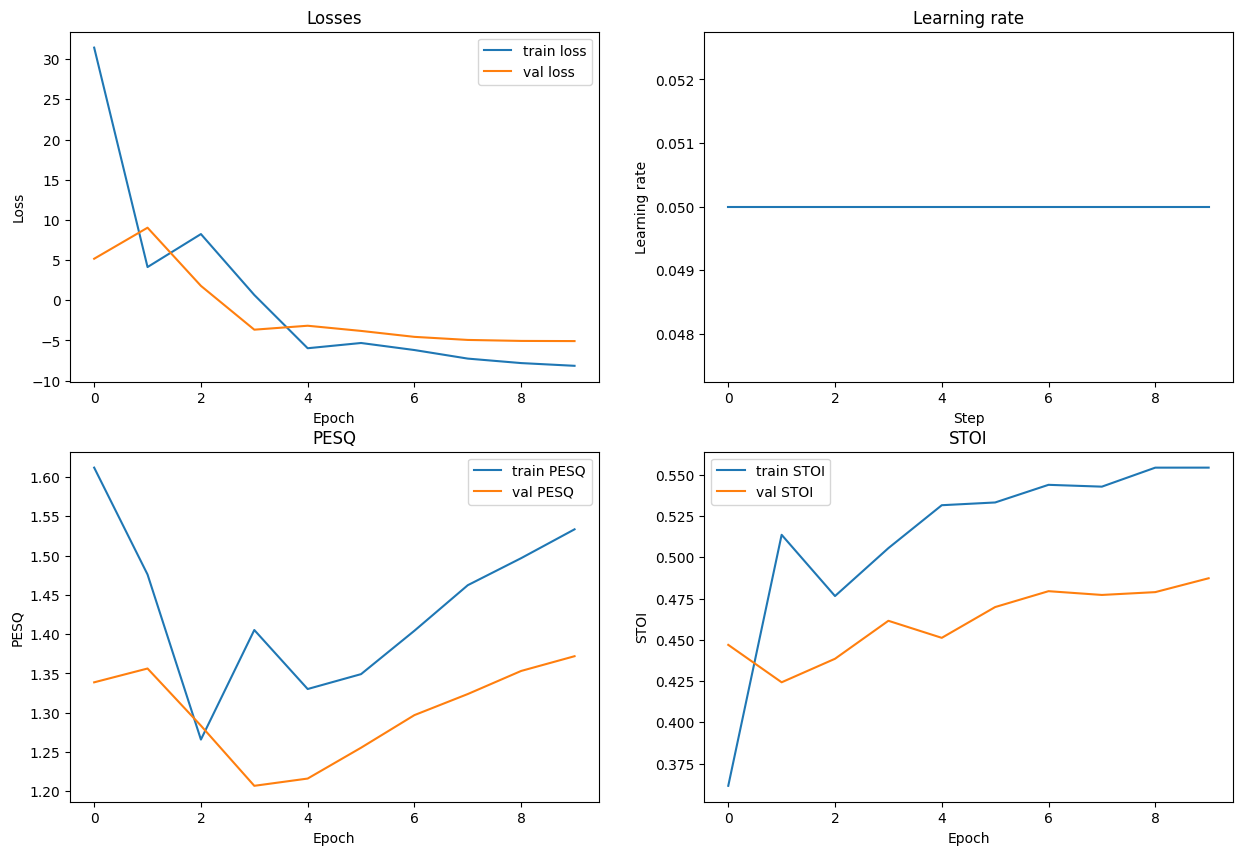

In [182]:
plot_results(train_losses, val_losses, train_pesqs, val_pesqs, train_stois, val_stois, learning_rates)

In [183]:
input_sample = next(iter(train_loader_w))
ipd.display(ipd.Audio(input_sample['denoising'].detach().numpy(), rate=int(input_sample['sample_rate'])))

In [184]:
hear_examples(model, input_sample, device, model_type)

### SVS-UNet

In [185]:
model = UNet()
model_type = 'SpectrogramModel'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
base_lr = 0.05
optimizer = Adam(model.parameters(), lr=base_lr, weight_decay=1e-5)
criterion = torch.nn.L1Loss()
num_epochs = 10
save_to = 'svs_unet_1.pth'
plateau = True
lr_patience = 3
lr_factor = 0.5
warmup = True
batch_size = 1

train_dataset_s = AudioSpectrogramDataset(data_path, train=True)
test_dataset_s = AudioSpectrogramDataset(data_path, train=False)

#mini_train_dataset_s = torch.utils.data.Subset(train_dataset_s, range(1))
#mini_test_dataset_s = torch.utils.data.Subset(test_dataset_s, range(1))

train_loader_s = torch.utils.data.DataLoader(train_dataset_s, batch_size=batch_size, shuffle=True)
test_loader_s = torch.utils.data.DataLoader(test_dataset_s, batch_size=batch_size, shuffle=False)

warmup_iters = len(train_loader_s)//4

In [186]:
train_losses, val_losses, train_pesqs, val_pesqs, train_stois, val_stois, learning_rates = train(
    model,
    train_loader_s,
    test_loader_s,
    device,
    optimizer,
    criterion,
    save_to,
    num_epochs=num_epochs,
    base_lr=base_lr,
    warmup=warmup,
    warmup_iters=warmup_iters,
    plateau=plateau,
    lr_patience=lr_patience,
    lr_factor=lr_factor,
    model_type=model_type
)

Epoch 1/10


100%|██████████| 1/1 [00:01<00:00,  1.64s/it]


Validation


100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


train_loss: 0.1226, val_loss: 0.1724, train_pesq: 2.0003, val_pesq: 1.6532, train_stoi: 0.6800, val_stoi: 0.6697, lr: 0.050000
Epoch 2/10


100%|██████████| 1/1 [00:01<00:00,  1.01s/it]


Validation


100%|██████████| 1/1 [00:00<00:00,  1.07it/s]


train_loss: 0.0633, val_loss: 0.1655, train_pesq: 3.1145, val_pesq: 1.8012, train_stoi: 0.8106, val_stoi: 0.7284, lr: 0.050000
Epoch 3/10


100%|██████████| 1/1 [00:01<00:00,  1.06s/it]


Validation


100%|██████████| 1/1 [00:01<00:00,  1.03s/it]


train_loss: 0.0576, val_loss: 0.1655, train_pesq: 3.0885, val_pesq: 1.8012, train_stoi: 0.8125, val_stoi: 0.7284, lr: 0.050000
Epoch 4/10


100%|██████████| 1/1 [00:01<00:00,  1.14s/it]


Validation


100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


train_loss: 0.0552, val_loss: 0.1655, train_pesq: 3.0446, val_pesq: 1.8012, train_stoi: 0.8145, val_stoi: 0.7284, lr: 0.050000
Epoch 5/10


100%|██████████| 1/1 [00:01<00:00,  1.45s/it]


Validation


100%|██████████| 1/1 [00:01<00:00,  1.08s/it]


train_loss: 0.0542, val_loss: 0.1655, train_pesq: 2.9825, val_pesq: 1.8012, train_stoi: 0.8140, val_stoi: 0.7284, lr: 0.050000
Epoch 6/10


100%|██████████| 1/1 [00:01<00:00,  1.73s/it]


Validation


100%|██████████| 1/1 [00:01<00:00,  1.02s/it]


train_loss: 0.0544, val_loss: 0.1655, train_pesq: 2.9796, val_pesq: 1.7936, train_stoi: 0.8141, val_stoi: 0.7248, lr: 0.050000
Epoch 7/10


100%|██████████| 1/1 [00:01<00:00,  1.42s/it]


Validation


100%|██████████| 1/1 [00:00<00:00,  1.08it/s]


train_loss: 0.0543, val_loss: 0.1655, train_pesq: 2.9759, val_pesq: 1.7483, train_stoi: 0.8142, val_stoi: 0.6948, lr: 0.025000
Epoch 8/10


100%|██████████| 1/1 [00:01<00:00,  1.25s/it]


Validation


100%|██████████| 1/1 [00:01<00:00,  1.04s/it]


train_loss: 0.0542, val_loss: 0.1631, train_pesq: 2.9794, val_pesq: 1.7399, train_stoi: 0.8141, val_stoi: 0.6854, lr: 0.025000
Epoch 9/10


100%|██████████| 1/1 [00:01<00:00,  1.45s/it]


Validation


100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


train_loss: 0.0539, val_loss: 0.1597, train_pesq: 2.9875, val_pesq: 1.7108, train_stoi: 0.8154, val_stoi: 0.6563, lr: 0.025000
Epoch 10/10


100%|██████████| 1/1 [00:01<00:00,  1.09s/it]


Validation


100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

train_loss: 0.0541, val_loss: 0.1563, train_pesq: 2.9730, val_pesq: 1.6986, train_stoi: 0.8159, val_stoi: 0.6473, lr: 0.025000


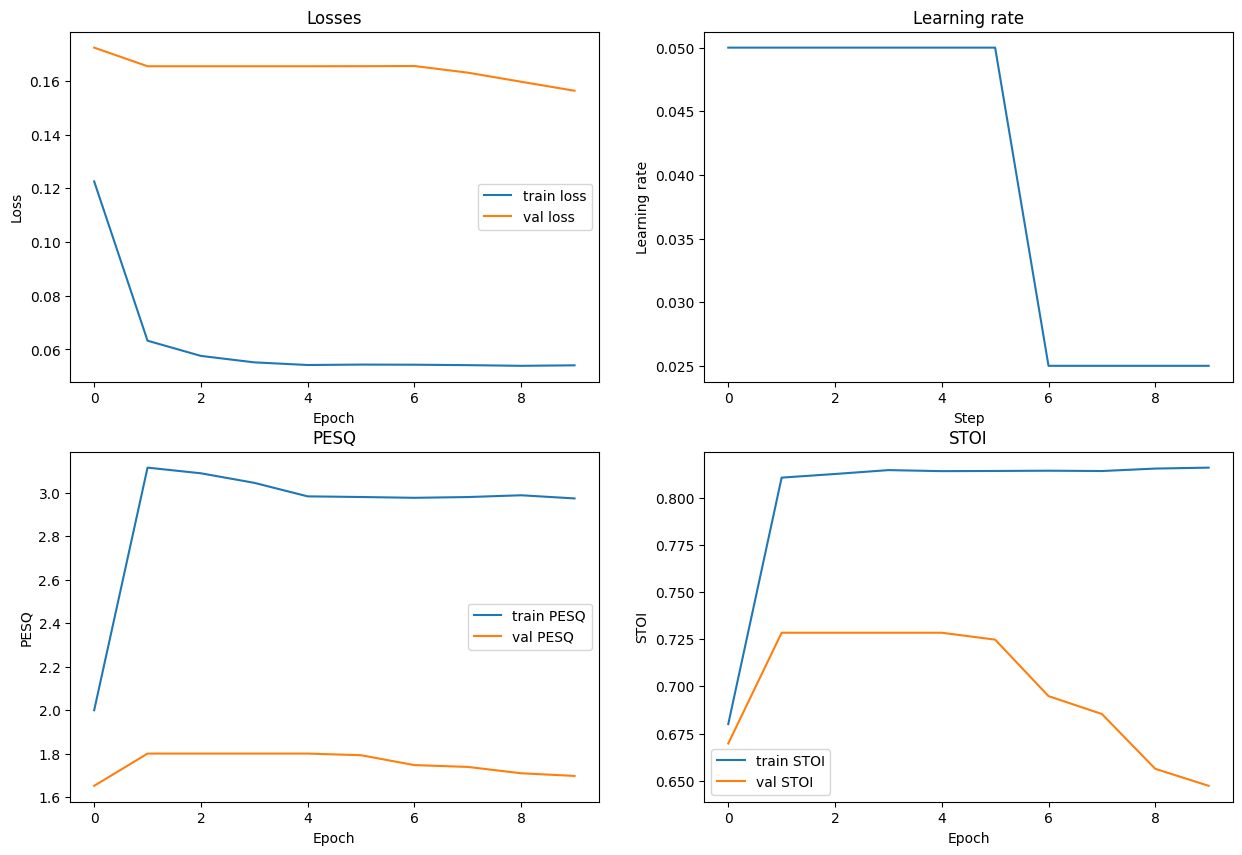

In [187]:
plot_results(train_losses, val_losses, train_pesqs, val_pesqs, train_stois, val_stois, learning_rates)

In [188]:
input_sample = next(iter(train_loader_s))
ipd.display(ipd.Audio(spectrogram_to_waveform(input_sample['denoising'].squeeze(), input_sample['denoising_phase'].squeeze(), original_length=80000), rate=int(input_sample['sample_rate'])))

In [189]:
hear_examples(model, input_sample, device, model_type)

## Résultats